In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

In [3]:
#Lectura del DataFrame
df = pd.read_csv(r'C:\Users\Diana\Desktop\Formacion\dsft-jun23-Diana\Desafio\houses_rent_info2 (1).csv', sep = ",")
df.head()

,Place,Location,Rooms,Toilets,Area,Air Conditioning,Built-in Wardrobes,Elevator,Heating,Garage,Terrace,Furnished,Balcony,Garden,Pool,Price
0,Piso,Arganzuela,2,2,70,1,1,1,1,0,0,1,0,0,0,3500
1,Ático,Arganzuela,2,2,86,1,1,1,1,0,1,1,0,0,1,2000
2,Piso,Arganzuela,1,1,74,1,1,1,1,1,0,0,0,1,1,1200
3,Piso,Arganzuela,1,1,28,1,1,1,1,0,1,1,0,1,1,1400
4,Piso,Arganzuela,2,2,65,1,0,1,1,1,1,1,1,1,1,2490


In [4]:
# Estadísticos
df.describe(include='all')

,Place,Location,Rooms,Toilets,Area,Air Conditioning,Built-in Wardrobes,Elevator,Heating,Garage,Terrace,Furnished,Balcony,Garden,Pool,Price
count,5325,5325,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000
unique,4,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Piso,Salamanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4792,1156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.244883,1.826479,109.899718,0.783099,0.770704,0.856526,0.795493,0.248451,0.355681,0.647700,0.260469,0.141972,0.185164,2636.454836
std,NaN,NaN,1.190896,0.976976,71.719901,0.412174,0.420419,0.350589,0.403379,0.432155,0.478764,0.477732,0.438932,0.349054,0.388467,1750.519076
min,NaN,NaN,1.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000
25%,NaN,NaN,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000
50%,NaN,NaN,2.000000,2.000000,90.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2240.000000
75%,NaN,NaN,3.000000,2.000000,134.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3200.000000


In [5]:
# Tipos de los datos y missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Place               5325 non-null   object
 1   Location            5325 non-null   object
 2   Rooms               5325 non-null   int64 
 3   Toilets             5325 non-null   int64 
 4   Area                5325 non-null   int64 
 5   Air Conditioning    5325 non-null   int64 
 6   Built-in Wardrobes  5325 non-null   int64 
 7   Elevator            5325 non-null   int64 
 8   Heating             5325 non-null   int64 
 9   Garage              5325 non-null   int64 
 10  Terrace             5325 non-null   int64 
 11  Furnished           5325 non-null   int64 
 12  Balcony             5325 non-null   int64 
 13  Garden              5325 non-null   int64 
 14  Pool                5325 non-null   int64 
 15  Price               5325 non-null   int64 
dtypes: int64(14), object(2)


In [6]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(df)

COL_N,Place,Location,Rooms,Toilets,Area,Air Conditioning,Built-in Wardrobes,Elevator,Heating,Garage,Terrace,Furnished,Balcony,Garden,Pool,Price
DATA_TYPE,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,4,21,10,9,318,2,2,2,2,2,2,2,2,2,2,761
CARDIN (%),0.08,0.39,0.19,0.17,5.97,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,14.29


In [7]:
df[['Place']].value_counts()

Place      
Piso           4792
Ático           406
Dúplex          119
Apartamento       8
Name: count, dtype: int64

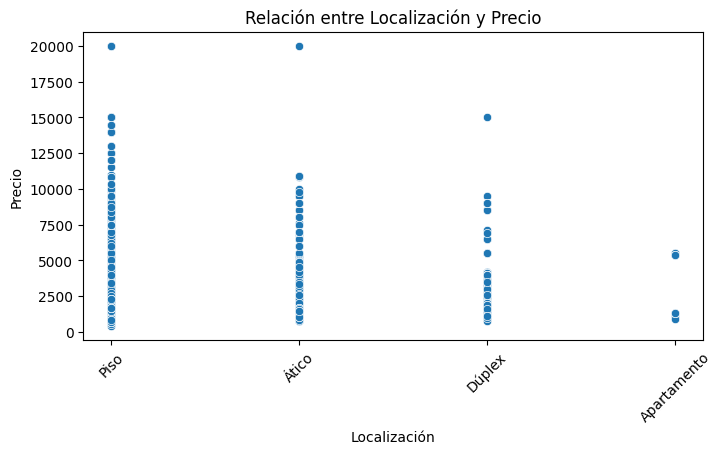

In [8]:
plt.figure(figsize=(8, 4))

# Usamos un scatter plot para mostrar la relación entre 'Location' y 'Price'
sns.scatterplot(x='Place', y='Price', data=df)

# Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Agregamos un título y etiquetas a los ejes
plt.title('Relación entre Localización y Precio')
plt.xlabel('Localización')
plt.ylabel('Precio')

# Mostramos el gráfico
plt.show()

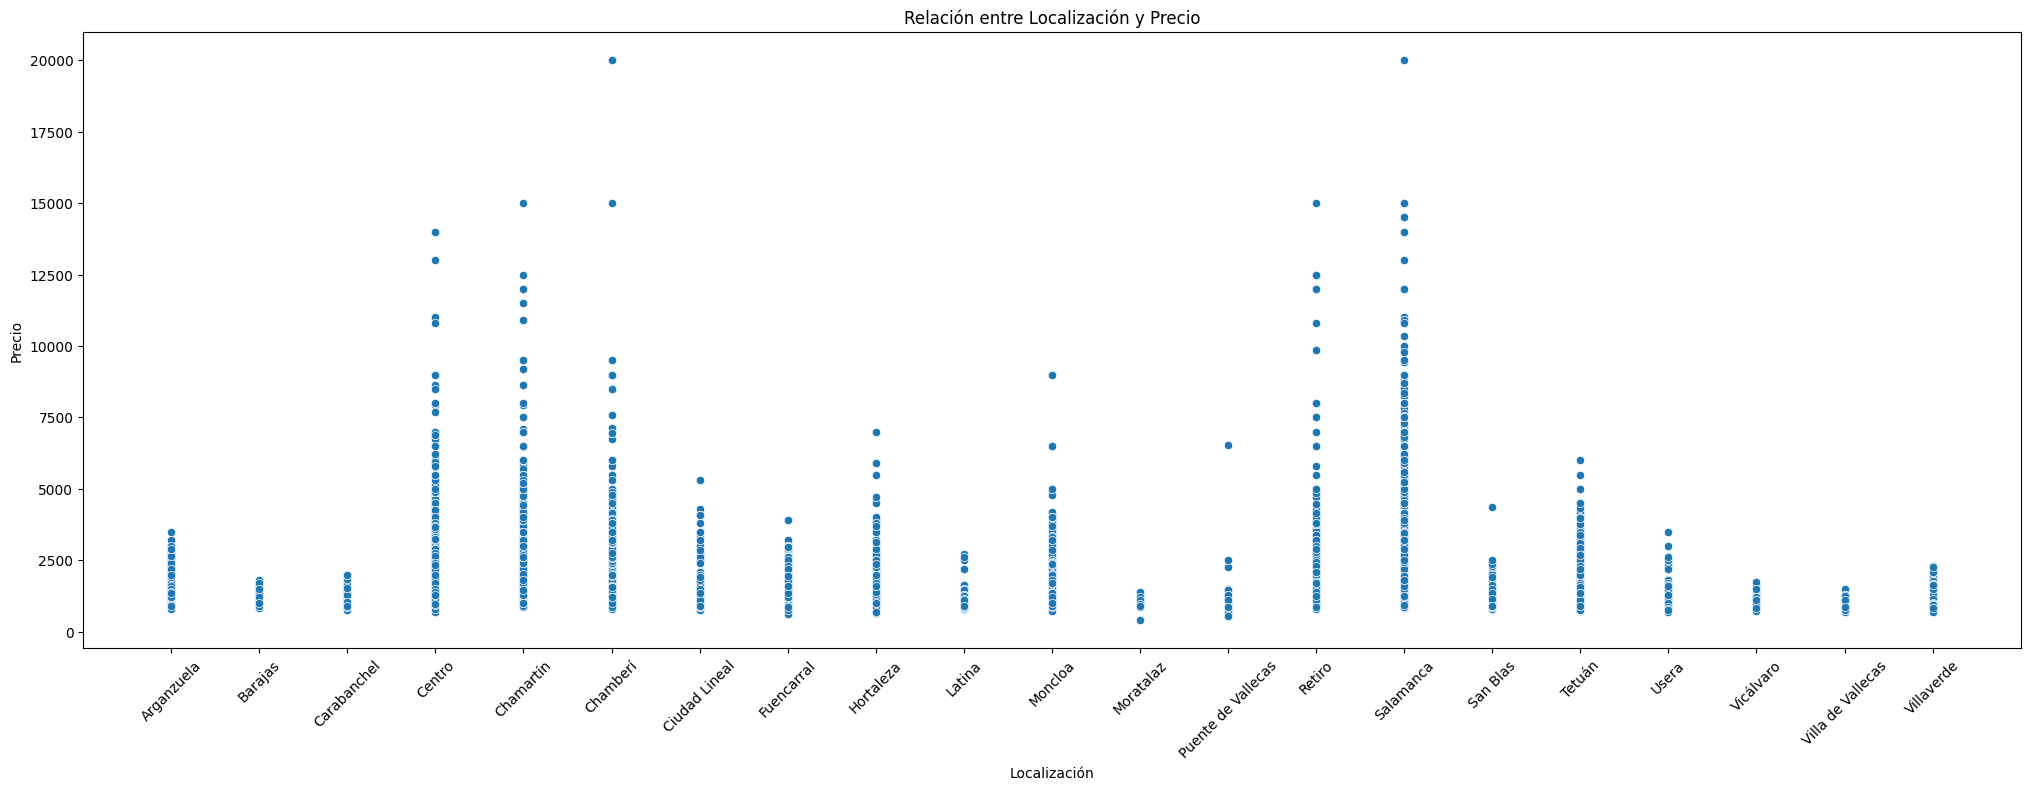

In [9]:
plt.figure(figsize=(25, 8))

# Usamos un scatter plot para mostrar la relación entre 'Location' y 'Price'
sns.scatterplot(x='Location', y='Price', data=df)

# Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Agregamos un título y etiquetas a los ejes
plt.title('Relación entre Localización y Precio')
plt.xlabel('Localización')
plt.ylabel('Precio')

# Mostramos el gráfico
plt.show()

In [10]:
num_obs_menor_igual_5000 = df[df['Price'] <= 10000].shape[0]
num_obs_menor_igual_5000

5283

In [11]:
df['Price'].agg('median')

2240.0

In [12]:
precios_localizacion = df.groupby('Location')['Price'].agg(['mean', 'min', 'max'])
resultados_sorted = precios_localizacion.sort_values(by='mean', ascending=False)
resultados_sorted

,mean,min,max
Location,,,
Salamanca,3620.451557,845,20000
Chamberí,3045.518400,800,20000
Chamartín,2919.549683,850,15000
Retiro,2791.245033,800,15000
Centro,2575.994247,675,14000
Moncloa,2339.254717,740,9000
Hortaleza,2027.715640,650,7000
Tetuán,2002.106383,720,6000
Fuencarral,1776.464000,625,3900


In [318]:
'''df.loc[df['Price'] > 5000, 'Price'] = df['Price'].agg('median')'''

In [319]:
'''precios_localizacion = df.groupby('Location')['Price'].agg(['mean', 'min', 'max'])
resultados_sorted = precios_localizacion.sort_values(by='max', ascending=False)
resultados_sorted'''

,mean,min,max
Location,,,
Moncloa,2267.179245,740,5000
Retiro,2422.536424,800,5000
Centro,2356.531160,675,5000
Chamartín,2417.837209,850,5000
Chamberí,2702.358400,800,5000
Tetuán,1983.436170,720,5000
Salamanca,2800.881488,845,5000
Hortaleza,1955.014218,650,4700
San Blas,1325.696970,790,4375


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location_num'] = le.fit_transform(df['Location'])
df['Place_num'] = le.fit_transform(df['Place'])

In [16]:
precios_menor_1500 = df[df['Price'] < 1500]['Price'].count()
precios_entre_1501_y_2500 = df[(df['Price'] >= 1501) & (df['Price'] <= 2500)]['Price'].count()
precios_mayor_2501 = df[df['Price'] > 2501]['Price'].count()

print('Alquileres menores a 1500€',precios_menor_1500)
print('Alquileres entre 1501€ y 2500€',precios_entre_1501_y_2500)
print('Alquileres mayores a 2501€',precios_mayor_2501)

Alquileres menores a 1500€ 1257
Alquileres entre 1501€ y 2500€ 1781
Alquileres mayores a 2501€ 2152


In [17]:
bins = [0, 1500, 2500, np.inf]
labels = ['< 1500', '1500 - 2500', '> 2500']
df['Precio Rango'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

df

,Place,Location,Rooms,Toilets,Area,Air Conditioning,Built-in Wardrobes,Elevator,Heating,Garage,Terrace,Furnished,Balcony,Garden,Pool,Price,Location_num,Place_num,Precio Rango
0,Piso,Arganzuela,2,2,70,1,1,1,1,0,0,1,0,0,0,3500,0,2,> 2500
1,Ático,Arganzuela,2,2,86,1,1,1,1,0,1,1,0,0,1,2000,0,3,1500 - 2500
2,Piso,Arganzuela,1,1,74,1,1,1,1,1,0,0,0,1,1,1200,0,2,< 1500
3,Piso,Arganzuela,1,1,28,1,1,1,1,0,1,1,0,1,1,1400,0,2,< 1500
4,Piso,Arganzuela,2,2,65,1,0,1,1,1,1,1,1,1,1,2490,0,2,1500 - 2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,Piso,Villaverde,3,1,75,0,0,1,0,0,1,0,0,0,0,840,20,2,< 1500
5321,Piso,Villaverde,1,1,40,0,0,0,0,0,1,0,0,0,0,700,20,2,< 1500
5322,Piso,Villaverde,1,2,67,1,0,1,0,1,1,1,0,0,0,1650,20,2,1500 - 2500
5323,Piso,Villaverde,1,1,71,1,0,1,0,1,0,1,1,0,0,1650,20,2,1500 - 2500


In [18]:
rangos = {'< 1500': 0, '1500 - 2500': 1, '> 2500': 2}
df['Precio Rango Numérico'] = df['Precio Rango'].map(rangos)
df

,Place,Location,Rooms,Toilets,Area,Air Conditioning,Built-in Wardrobes,Elevator,Heating,Garage,Terrace,Furnished,Balcony,Garden,Pool,Price,Location_num,Place_num,Precio Rango,Precio Rango Numérico
0,Piso,Arganzuela,2,2,70,1,1,1,1,0,0,1,0,0,0,3500,0,2,> 2500,2
1,Ático,Arganzuela,2,2,86,1,1,1,1,0,1,1,0,0,1,2000,0,3,1500 - 2500,1
2,Piso,Arganzuela,1,1,74,1,1,1,1,1,0,0,0,1,1,1200,0,2,< 1500,0
3,Piso,Arganzuela,1,1,28,1,1,1,1,0,1,1,0,1,1,1400,0,2,< 1500,0
4,Piso,Arganzuela,2,2,65,1,0,1,1,1,1,1,1,1,1,2490,0,2,1500 - 2500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,Piso,Villaverde,3,1,75,0,0,1,0,0,1,0,0,0,0,840,20,2,< 1500,0
5321,Piso,Villaverde,1,1,40,0,0,0,0,0,1,0,0,0,0,700,20,2,< 1500,0
5322,Piso,Villaverde,1,2,67,1,0,1,0,1,1,1,0,0,0,1650,20,2,1500 - 2500,1
5323,Piso,Villaverde,1,1,71,1,0,1,0,1,0,1,1,0,0,1650,20,2,1500 - 2500,1


In [200]:
'''nuevo_df = df.iloc[:, :-2]'''

In [20]:
X_df = df[['Rooms','Toilets','Area','Air Conditioning','Built-in Wardrobes','Elevator','Heating','Garage','Terrace','Furnished','Balcony','Garden','Pool','Location_num','Place_num']]
y_df = df.iloc[:,-1]

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df, test_size=0.2, random_state= 42)

In [22]:
print("Rango de X_train_df", X_train_df.shape)
print("Rango de X_test_df", X_test_df.shape)
print("Rango de y_train_df", y_train_df.shape)
print("Rango de y_test_df", y_test_df.shape)

Rango de X_train_df (4260, 15)
Rango de X_test_df (1065, 15)
Rango de y_train_df (4260,)
Rango de y_test_df (1065,)


In [26]:

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_df, y_train_df)

scaler = StandardScaler()
X_train_scaler_df = scaler.fit_transform(X_res)
X_test_scaler_df = scaler.transform(X_test_df)


In [27]:
y_train_df.count()

4260

In [28]:
num_filas = y_res.shape[0]
print(num_filas)

5478


In [31]:
#convertir variables categóricas en numéricas

rf = RandomForestRegressor(n_estimators=100)

# Entrenar el modelo
rf.fit(X_train_df, y_train_df)

# Obtener la importancia de las características
scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_df.columns), reverse=True)
df_scores = pd.DataFrame(scores, columns=['Score', 'Feature'])

# Imprimir las características y sus importancias
print(df_scores)


     Score             Feature
0   0.3390             Toilets
1   0.2322                Area
2   0.1264        Location_num
3   0.0691           Furnished
4   0.0337               Rooms
5   0.0262    Air Conditioning
6   0.0235             Heating
7   0.0228             Terrace
8   0.0226             Balcony
9   0.0210  Built-in Wardrobes
10  0.0198              Garage
11  0.0184              Garden
12  0.0165           Place_num
13  0.0165            Elevator
14  0.0122                Pool


In [62]:
X = df[['Toilets', 'Area', 'Location_num','Furnished','Rooms', 'Air Conditioning', 'Heating','Terrace','Balcony', 'Built-in Wardrobes', 'Garage', 'Garden', 'Place_num', 'Elevator', 'Pool']]
y = df.iloc[:,-1]

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X,y, test_size=0.2, random_state= 42)

In [63]:
smote = SMOTE(random_state=42)
X_res_random, y_res_random = smote.fit_resample(X_train_random, y_train_random)

In [64]:
scaler = StandardScaler()
X_train_scaler_random = scaler.fit_transform(X_res_random)
X_test_scaler_random = scaler.transform(X_test_random)

In [65]:
cv = RepeatedKFold(n_splits=5, n_repeats = 2, random_state=1) 

In [36]:
#Regresión logística con datos balanceados
reg_log = Pipeline([("reglog", LogisticRegression(solver = 'lbfgs'))]) 
reg_log_param = {'reglog__C': [0.1,0.5,1,10,50,100], 
                'reglog__max_iter': [250], 
                'reglog__fit_intercept':[True],
                'reglog__intercept_scaling':[1],
                'reglog__penalty':['l2'],
                'reglog__tol':[0.00001,0.0001,0.000001]}

log_primal_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0, n_jobs=-1)
log_primal_Grid.fit(X_train_scaler_random, y_res_random)

best_model = log_primal_Grid.best_estimator_
best_score = log_primal_Grid.best_score_
train_score = best_model.score(X_train_scaler_random, y_res_random)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('reglog', LogisticRegression(C=0.5, max_iter=250, tol=1e-05))])
Puntuación de validación cruzada: 0.6966980801919809
Puntuación en el conjunto de entrenamiento: 0.7000730193501278


In [38]:
#Regresión Logística con extensión polinómica con datos balanceados
reg_log = Pipeline([("reglog", LogisticRegression(solver = 'liblinear'))]) 
reg_log_param = {'reglog__C': [0.1,10,50], 
                'reglog__max_iter': [300,500], 
                'reglog__fit_intercept':[True],
                'reglog__intercept_scaling':[1],
                'reglog__penalty':['l2'],
                'reglog__tol':[0.0001,0.000001]}

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train_random)
log_pol2_Grid = GridSearchCV(reg_log,reg_log_param, cv=cv, refit=True, verbose=0, n_jobs=-1)
log_pol2_Grid.fit(X_train_scaler_random, y_res_random)

best_model = log_pol2_Grid.best_estimator_
best_score = log_pol2_Grid.best_score_
train_score = best_model.score(X_train_scaler_random, y_res_random)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: Pipeline(steps=[('reglog',
                 LogisticRegression(C=50, max_iter=300, solver='liblinear'))])
Puntuación de validación cruzada: 0.6750652434756524
Puntuación en el conjunto de entrenamiento: 0.6778021175611537


In [75]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
#RandomForest con datos balanceados
param_grid = {
    'max_depth': [3,4,5,6,7,8,9],
    'max_features': [2,4,6,7,8,9],
    'n_estimators': [50, 100],
    'min_samples_split': [3, 5, 6, 7]}


RanFor = RandomForestClassifier()
RanFor_grid = GridSearchCV(RanFor, param_grid, cv=cv, refit=True, verbose=0, n_jobs=-1)
RanFor_grid.fit(X_train_scaler_random, y_res_random)

best_model = RanFor_grid.best_estimator_
best_score = RanFor_grid.best_score_
train_score = best_model.score(X_train_scaler_random, y_res_random)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: RandomForestClassifier(max_depth=9, max_features=4, min_samples_split=3,
                       n_estimators=50)
Puntuación de validación cruzada: 0.7636001399860014
Puntuación en el conjunto de entrenamiento: 0.8218327856882074


In [78]:
#XGBClassifier con datos balanceados
param_grid = {
    'max_depth': [5,6,7,8],
    'gamma': [0.01,0.001,0.001],
    'min_child_weight': [1,5,10],
    'learning_rate': [0.05,0.1, 0.2, 0.3],
    'n_estimators':[5,10,20,100] }


xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, refit=True, verbose=0,n_jobs=-1)
xgb_grid.fit(X_train_scaler_random, y_res_random)

best_model = xgb_grid.best_estimator_
best_score = xgb_grid.best_score_
train_score = xgb_grid.score(X_train_scaler_random, y_res_random)

print("Mejor modelo:", best_model)
print("Puntuación de validación cruzada:", best_score)
print("Puntuación en el conjunto de entrenamiento:", train_score)

Mejor modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Puntuación de validación cruzada: 0.8101654834516548
Puntuación en el conjunto de entrenamiento: 0.9653158086893027


Accuracy 0.7755868544600939
Precisión 0.7699321452800492
Recall 0.7716777964329888
F1-Score 0.7707448154266352


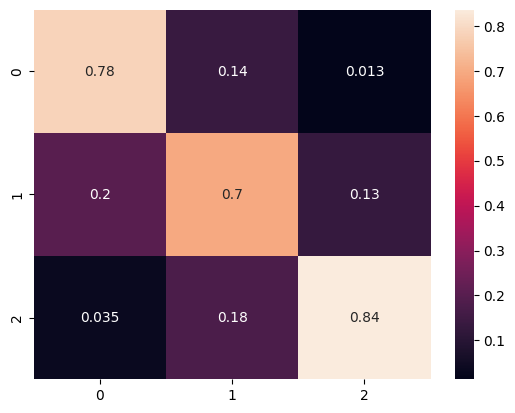

In [79]:
y_pred = xgb_grid.predict(X_test_scaler_random)
c_mat = confusion_matrix(y_test_random,y_pred)


sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('Accuracy',accuracy_score(y_test_random,y_pred))
print('Precisión',precision_score(y_test_random, y_pred, average='macro'))
print('Recall',recall_score(y_test_random, y_pred, average='macro'))
print('F1-Score',f1_score(y_test_random, y_pred, average='macro'))
